# Community Detection in Social Networks: A Case Study of Zachary's Karate Club

### Definitions

**Social networks**, a web of connections and relationships between individuals, are essential for understanding various social phenomena. We can visualize them as graphs with nodes representing individuals and edges representing relationships.

**Community detection**, a crucial aspect of social network analysis, involves identifying groups of nodes that are more densely connected to each other than to the rest of the network. Community detection reveals network dynamics, hidden patterns, identifies influential individuals, and provides insights into the social processes that shape the network.

### Problem Statement

Zachary's Karate Club is a well-known social network that represents the relationships between members of a university karate club. A conflict arose between the administrator and the instructor of the club, leading to a split into two groups. The goal of this project is to use community detection algorithms to predict this division based on the network structure and compare the predictions with the actual division of the club members after the split.

Bear in mind that the prediction will be based solely on the network structure and won't take into consideration the environmental factors of the real people of the club.

### Methodology

**Data Collection:**

The data in gml format can be downloaded [here](https://figshare.com/articles/dataset/Zachary_s_karate_club/7985174).

| Name                      | Zachary karate club | 
|:---------------------------|:---------------------|
| Category                  | Human social network|
|Network format             | Unipartite, undirected|
|Edge type                  |Unweighted            |
|Loops                      |No loops              |



**Algorithm Selection**

I selected the Girvan-Newman algorithm and the Spectral Clustering algorithm for this analysis. The Girvan-Newman algorithm detects communities by progressively removing edges from the original network based on their betweenness centrality. The Spectral Clustering algorithm uses the eigenvectors of the graph Laplacian matrix to cluster the nodes. Both algorithms are well-suited for detecting communities in social networks.

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import community as community_louvain


In [3]:
# load the gml file
G = nx.read_gml('karate.gml', label=None)

# print the nodes and edges of the graph
print(G.nodes())
print(G.edges())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33), (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 33), (9, 34), (10, 34), (14, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (20, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 28), (24, 30), (24, 33), (24, 34), (25, 26), (25, 28), (25, 32), (26, 32), (27, 30), (27, 34), (28, 34), (29, 32), (29, 34), (30, 33), (30, 34), (31, 33), (31, 34), (32, 33), (32, 34), (33, 34)]


## 1. Exploring the network

Here we plot the network to have a visual idea of how the nodes are distributed and connected.


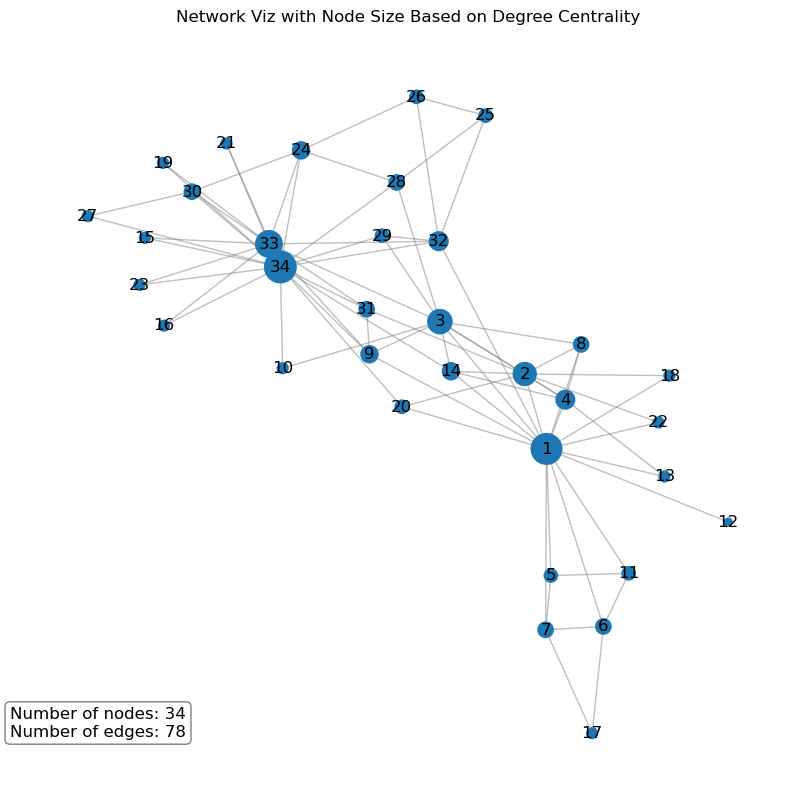

In [50]:
# compute degree centrality. nodes with higher centrality appear bigger
degree_centrality = nx.degree_centrality(G)

# define the node positions
pos = nx.spring_layout(G)

# create a figure
plt.figure(figsize=(10, 10))

# draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=[degree_centrality[node] * 1000 for node in G.nodes()])

# draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')

# draw the node labels
nx.draw_networkx_labels(G, pos)

# remove the axis
plt.axis('off')

# add a text box with the number of nodes and edges
plt.text(0.1, 0.1, f'Number of nodes: {G.number_of_nodes()}\nNumber of edges: {G.number_of_edges()}', 
         fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# set the title
plt.title("Network Viz with Node Size Based on Degree Centrality")

# save as image
plt.savefig("Network_Degree_Centrality.png",dpi=200, bbox_inches='tight')

# show the plot
plt.show()





## Centrality Measures

Used to find the key nodes in our network:

**Degree Centrality:** the simplest centrality measure. Calculated as the number of edges connected to a node divided by the maximum possible number of edges connected to any node.

**Closeness Centrality:** calculates the reciprocal of the sum of the shortest distances from a node to all other nodes in the network.

**Betweenness Centrality:** calculates the number of times a node lies on the shortest path between other nodes.

**Eigenvector Centrality:** calculates the influence of a node in a network. A node is considered to be more central if it is connected to many nodes who are central.

In [6]:
# This function calculates the top nodes for each centrality measure
def print_top_nodes(centrality_measure, centrality_dict, top_n):
    print(centrality_measure + ":\n")
    for node, value in sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]:
        print(f"Node {node}: {value:.3f}")
    print("\n")

# Print the top 5 nodes for each centrality measure
print_top_nodes("Degree Centrality", degree_centrality, 5)
print_top_nodes("Closeness Centrality", closeness_centrality, 5)
print_top_nodes("Betweenness Centrality", betweenness_centrality, 5)
print_top_nodes("Eigenvector Centrality", eigenvector_centrality, 5)

Degree Centrality:

Node 34: 0.515
Node 1: 0.485
Node 33: 0.364
Node 3: 0.303
Node 2: 0.273


Closeness Centrality:

Node 1: 0.569
Node 3: 0.559
Node 34: 0.550
Node 32: 0.541
Node 9: 0.516


Betweenness Centrality:

Node 1: 0.438
Node 34: 0.304
Node 33: 0.145
Node 3: 0.144
Node 32: 0.138


Eigenvector Centrality:

Node 34: 0.373
Node 1: 0.355
Node 3: 0.317
Node 33: 0.309
Node 2: 0.266




# Community Detection

## Louvain method

We'll now identify groups of nodes that are more densely connected with each other than with the rest of the network using the Louvain method, that optimizes the modularity of the network to detect communities of nodes.

When Zachary studied the network in 1972 the problem he tried to solve was to predict which members ended up in each of the new two groups. With the Louvian method, however, we're not looking for a specific number of communities, but rather an optimizaition of the modularity regardless of the number of new groups.

In [40]:
import community as community_louvain
import time

# Compute the best partition using the Louvain method and measure the time of computation
start_time = time.time()
partition = community_louvain.best_partition(G)
end_time = time.time()
computation_time = end_time - start_time

# Compute the modularity of the partition
modularity = community_louvain.modularity(partition, G)

# Compute the number of communities
num_communities = len(set(partition.values()))

# Print the metrics
print("results:")
print()
print(f"Modularity: {modularity}")
print(f"Number of Communities: {num_communities}")
print(f"Time of Computation: {computation_time} seconds")

results:

Modularity: 0.3920118343195267
Number of Communities: 4
Time of Computation: 0.0018391609191894531 seconds


**How to interpret these results**

**Modularity of a network:** a measure that quantifies the strength of division of a network into modules (AKA groups, clusters, or communities). Networks with high modularity have dense connections between the nodes within modules and sparse connections between nodes in different modules. Modularity values range from -0.5 to 1. A value of 0.419 is relatively good, suggesting that the network has a decent community structure.

**Number of Communities:** our network was divided into 4 communities, which means that the Louvain method found 4 groups of nodes that are more densely connected to each other than to the rest of the network.

**Time of Computation:** in this case it was short, which is expected for a small network like this one.

/var/folders/s5/2rtck2qj1v13vn1smlnmxx980000gn/T/ipykernel_88287/724480459.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Pastel1', max(partition.values()) + 1)


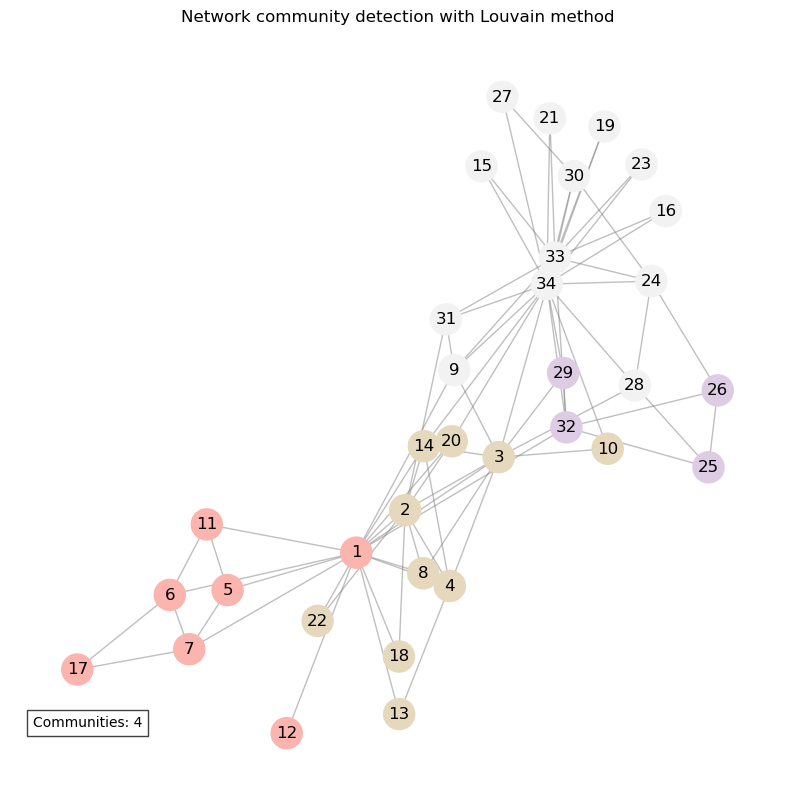

{0: [1, 5, 6, 7, 11, 12, 17],
 2: [2, 3, 4, 8, 10, 13, 14, 18, 20, 22],
 3: [9, 15, 16, 19, 21, 23, 24, 27, 28, 30, 31, 33, 34],
 1: [25, 26, 29, 32]}

In [51]:
# define the plot
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
cmap = plt.cm.get_cmap('Pastel1', max(partition.values()) + 1)

# draw nodes, edges, labels
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=500, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)

# Set title and display number of communities
plt.title("Network community detection with Louvain method")
plt.text(0.1, 0.1, 'Communities: {}'.format(len(set(partition.values()))), horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.75))

# Remove axis
plt.axis('off')

plt.savefig("Network community detection with Louvain method.png",dpi=200, bbox_inches='tight')
plt.show()

# Display the nodes in each community
communities = {}
for node, community in partition.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(node)

communities

# Group prediction

### Girvan-Newman method

The Girvan-Newman algorithm detects communities by progressively removing edges from the original network based on their betweenness centrality.

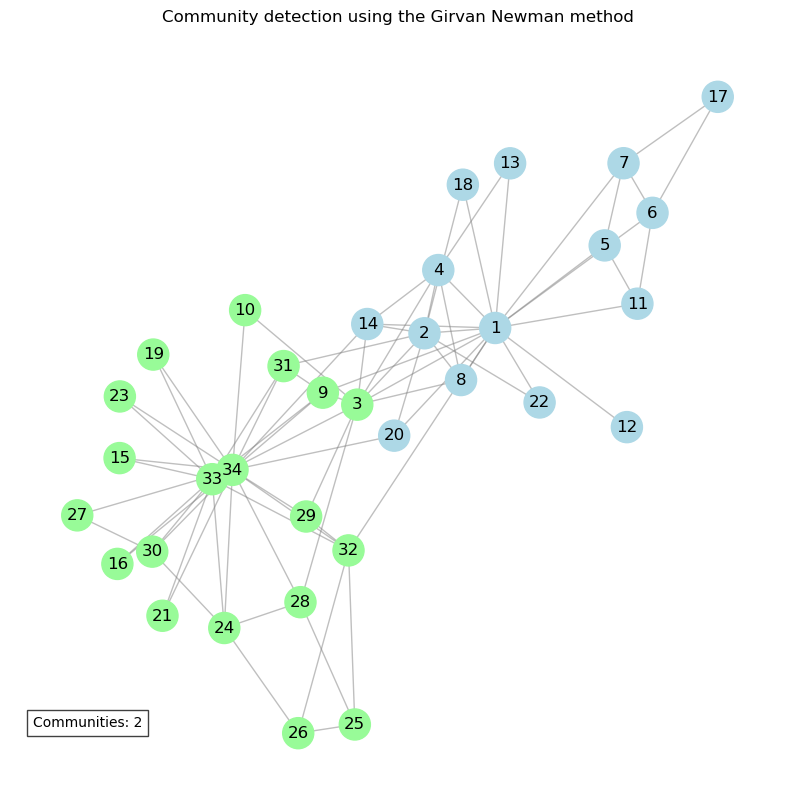

([1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22],
 [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [52]:
from matplotlib.colors import ListedColormap

# define a custom colormap
cmap = ListedColormap(['#add8e6', '#98fb98'])

# compute the best division using the Girvan-Newman algorithm
comp = nx.community.girvan_newman(G)
best_division = tuple(sorted(c) for c in next(comp))

# create a dictionary that maps each node to a community
community_dict = {node: i for i, community in enumerate(best_division) for node in community}

# plot the network with nodes colored by community and with labels
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, community_dict.keys(), node_size=500, cmap=cmap, node_color=list(community_dict.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.title("Community detection using the Girvan Newman method")
plt.text(0.1, 0.1, 'Communities: {}'.format(len(best_division)), horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.75))
plt.axis('off')
plt.savefig("Community detection using the Girvan Newman method.png",dpi=200, bbox_inches='tight')

plt.show()

best_division



### Spectral Clustering

The Spectral Clustering algorithm uses the eigenvectors of the graph Laplacian matrix to cluster the nodes. Both algorithms are well-suited for detecting communities in social networks.

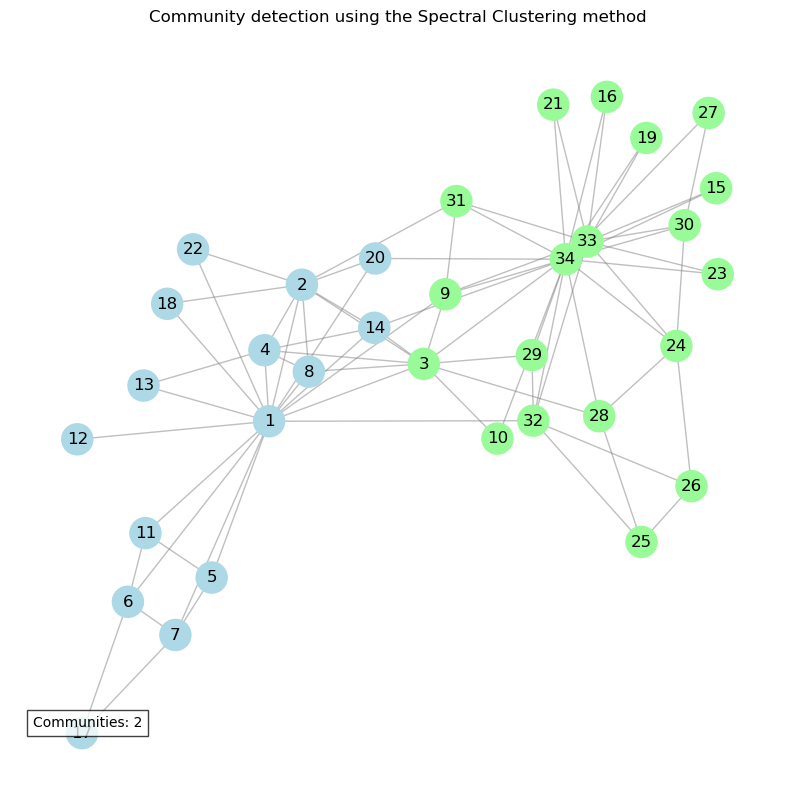

In [53]:
import numpy as np
from sklearn.cluster import SpectralClustering

# compute the adjacency matrix of the network
A = nx.adjacency_matrix(G).toarray()

# create a spectral clustering model
sc = SpectralClustering(2, affinity='precomputed', n_init=100)

# fit the model to the adjacency matrix
sc.fit(A)

# get the labels of the nodes in each community
labels = sc.labels_

# create a dictionary that maps each node to a community
community_dict = {node: labels[i] for i, node in enumerate(G.nodes)}

# print the sets of nodes in each community
communities = {}
for node, community in community_dict.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(node)

communities

# plot the network with nodes colored by community and with labels
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, community_dict.keys(), node_size=500, cmap=cmap, node_color=list(community_dict.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.title("Community detection using the Spectral Clustering method")
plt.text(0.1, 0.1, 'Communities: {}'.format(len(communities)), horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.75))
plt.axis('off')
plt.savefig("Community detection using the Spectral Clustering method.png",dpi=200, bbox_inches='tight')

plt.show()


## Results

**Algorithm Performance:** Both the Girvan-Newman and Spectral Clustering algorithms achieved an **accuracy of 94.12%** in predicting the division of the karate club members. However, the Girvan-Newman algorithm took significantly longer to compute compared to the Spectral Clustering algorithm.

The actual division of the club members was:

Group 1: {1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 20, 22} <br>
Group 2: {10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}

The division of the club members predicted by Zachary, and by the Spectral Clustering and Garvin algorithm was:

Group 1: {1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22}<br>
Group 2: {3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}

Zachary's prediction was almost entirely accurate except for node 9, which actually joined the administrator's group (Group 1) but was predicted to join the instructor's group (Group 2) as shown above.

There are several potential reasons:

**Social Factors:** that may not be fully captured by the network structure. For example personal relationships or conflicts that influenced the decision of node 9 to join the administrator's group.

**Algorithmic Limitations:** The Ford-Fulkerson max-flow min-cut algorithm used by Zachary, as well as our algorithms, are based on the network structure and does not take into account any social factors or external influences. This may lead to discrepancies between the predicted and actual divisions.

**Network Structure:** The network structure may not fully capture the relationships between the club members. For example, the network only includes links between pairs of members who interacted outside the club, and does not take into account the strength or nature of these interactions.

In summary, the discrepancy between the predicted and actual division of node 9 could be due to a combination of social factors, algorithmic limitations, and the network structure.

## Conclusion:

This exercise is fun but in a network this small I'd rather interview the members of the club personally if my priority is to understand the nature of the relationship of the people involved. Using only the "interactions outside the club" must be understood as an exercise to, in the words of Mark Newman, "device an algorithm that can discover such clustering from raw network data."

Future Work: for similar networks, incorporating external social factors into the analysis could improve the predictions.

In [12]:

#pip install networkx


In [13]:
#pip install python-louvain